# WeatherPy
----

### Analysis
* Of the cities tested, cities positioned at 0 degrees latitude experienced a smaller range of humidity than other cities, with a humidity no lower than 45%.

* Far more cities experienced 0% cloudiness as opposed to 100% cloudiness, outnumbering the latter by the dozens.

* Wind speeds cluster between 0 and 10 mph, regardless of location.

In [2]:
# Native library
import requests
import time
import json

# Third party
import numpy as np
import pandas as pd
from citipy import citipy
from ratelimit import limits
import matplotlib.pyplot as plt

# Custom
import api_keys

In [3]:
# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Components of api endpoint(s)
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + api_keys.api_key

# Creates variable for response code then prints response code to the console
response = requests.get(url + unit + api).json()
print(response)

# Creates dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

# Decorator that limits "call_api" function to 60 api calls per minute
@limits(calls=60, period=MINUTE)
def call_api():
    
    # A loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()

{'cod': '400', 'message': 'Nothing to geocode'}
Incomplete record. Skipping city instance...
Processing city 1: Zhalantun
Processing city 2: Punta Arenas
Processing city 3: Albany
Processing city 4: Ushuaia
Processing city 5: Guangzhou
Processing city 6: Hobart
Processing city 7: Butaritari
Processing city 8: Norman Wells
Processing city 9: Mahébourg
Processing city 10: Kapaa
Processing city 11: Mataura
Incomplete record. Skipping city instance...
Processing city 13: Kjøllefjord
Incomplete record. Skipping city instance...
Processing city 15: Alofi
Processing city 16: Jiaozuo
Incomplete record. Skipping city instance...
Processing city 18: Palmer
Incomplete record. Skipping city instance...
Processing city 20: Walvis Bay
Incomplete record. Skipping city instance...
Processing city 22: Hillsborough
Processing city 23: Jamestown
Processing city 24: Lorengau
Incomplete record. Skipping city instance...
Processing city 26: Alice Springs
Processing city 27: Ribeira Grande
Processing city 28

Processing city 259: Tual
Processing city 260: Portland
Processing city 261: Pa Sang
Processing city 262: Korhogo
Processing city 263: Inuvik
Processing city 264: Shawville
Processing city 265: Ben Tre
Processing city 266: Bathsheba
Processing city 267: Tasiilaq
Processing city 268: Yang Talat
Processing city 269: Marabba
Incomplete record. Skipping city instance...
Processing city 271: Kavaratti
Processing city 272: Ecoporanga
Incomplete record. Skipping city instance...
Processing city 274: Marawi
Incomplete record. Skipping city instance...
Processing city 276: Sokółka
Processing city 277: Khotyn
Incomplete record. Skipping city instance...
Processing city 279: Krasnovka
Incomplete record. Skipping city instance...
Processing city 281: Camacha
Incomplete record. Skipping city instance...
Incomplete record. Skipping city instance...
Processing city 284: Juazeiro
Processing city 285: Kruisfontein
Processing city 286: Pangnirtung
Processing city 287: Kewanee
Processing city 288: Tigil'

Processing city 522: Aracati
Processing city 523: Carutapera
Incomplete record. Skipping city instance...
Processing city 525: Timizart
Processing city 526: Jardim
Processing city 527: Pengcheng
Processing city 528: Thio
Incomplete record. Skipping city instance...
Processing city 530: Hīt
Processing city 531: Tambovka
Processing city 532: Macusani
Processing city 533: Mariental
Processing city 534: Kamina
Processing city 535: Sinnamary
Processing city 536: Qaqortoq
Processing city 537: Trabzon Province
Processing city 538: Mabaruma
Processing city 539: Coos Bay
Processing city 540: Kalmunai
Processing city 541: Asău
Processing city 542: Gamboma
Processing city 543: Haines Junction
Processing city 544: Puerto Baquerizo Moreno
Incomplete record. Skipping city instance...
Incomplete record. Skipping city instance...
Processing city 547: Petropavlivka
Processing city 548: Dinagat
Processing city 549: Koungou
Processing city 550: Tiznit Province
Processing city 551: Japura
Processing city 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Creates table/DataFrame from the "city_data" dictionary
city_data_df = pd.DataFrame(city_data)

# Exports DataFrame as a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Previews table/DataFrame
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhalantun,48.00,122.72,66.42,62,98,3.96,CN,1593805852
1,Punta Arenas,-53.15,-70.92,33.80,100,90,3.36,CL,1593805852
2,Albany,42.60,-73.97,73.99,80,100,5.86,US,1593805852
3,Ushuaia,-54.80,-68.30,30.20,92,90,3.04,AR,1593805852
4,Guangzhou,23.12,113.25,82.99,88,75,6.71,CN,1593805807
5,Hobart,-42.88,147.33,45.00,70,75,12.75,AU,1593805819
6,Butaritari,3.07,172.79,82.54,74,84,12.06,KI,1593805853
7,Norman Wells,65.28,-126.83,59.00,62,75,8.05,CA,1593805853
8,Mahébourg,-20.41,57.70,71.60,64,75,12.75,MU,1593805853
9,Kapaa,22.08,-159.32,82.99,69,40,14.99,US,1593805853


In [7]:
# Creates variables for relevant table columns
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

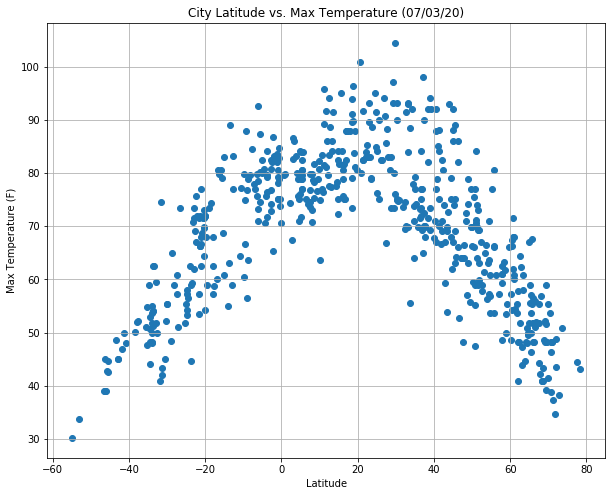

In [8]:
# Establishes size for the next visualization/graph
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration for visualization/graph
plt.scatter(lat, max_temp, linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Exports graph as a png image file (steps are repeated for the rest of the script...)
plt.savefig("Images/Fig1.png")

#### Latitude vs. Humidity Plot

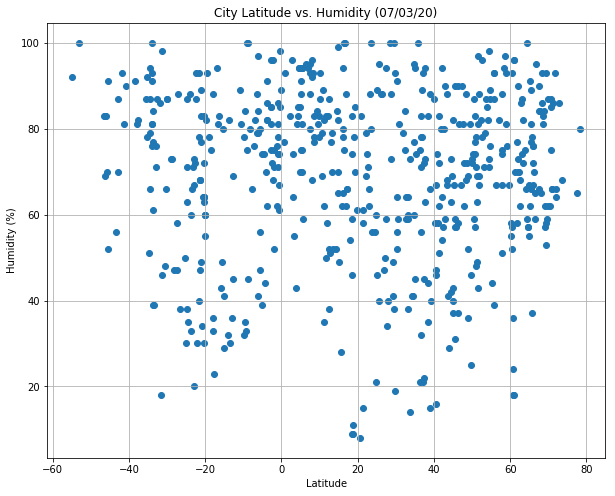

In [9]:
plt.figure(figsize=(10,8))

plt.scatter(lat, humidity, linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/Fig2.png")

#### Latitude vs. Cloudiness Plot

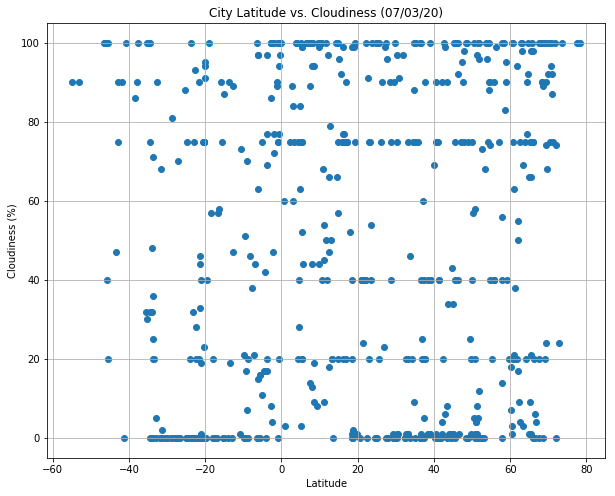

In [10]:
plt.figure(figsize=(10,8))

plt.scatter(lat, cloudiness, linewidths=1, marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/Fig3.png")

#### Latitude vs. Wind Speed Plot

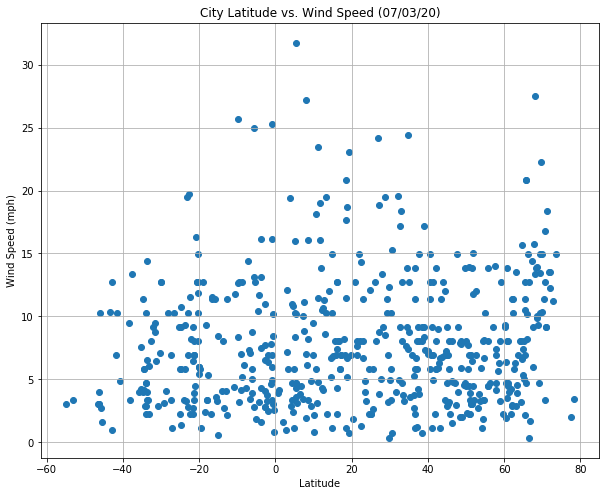

In [11]:
plt.figure(figsize=(10,8))

plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/Fig4.png")